In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

In [42]:
url="https://raw.githubusercontent.com/sayande01/Kaggle_Notebooks/refs/heads/main/gym_members_exercise_tracking.csv"
dataset=pd.read_csv(url)

In [43]:
dataset.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [44]:
dataset.shape

(973, 15)

In [45]:
dataset.isnull().sum() #any values null

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


In [46]:
dataset['Workout_Type'] = dataset['Workout_Type'].replace({'Yoga': 1, 'HIIT': 2, 'Cardio': 3, 'Strength': 4})
dataset['Gender'] = dataset['Gender'].replace({'Male': 1, 'Female': 2})

<ipython-input-46-6770b5505885>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Workout_Type'] = dataset['Workout_Type'].replace({'Yoga': 1, 'HIIT': 2, 'Cardio': 3, 'Strength': 4})
<ipython-input-46-6770b5505885>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Gender'] = dataset['Gender'].replace({'Male': 1, 'Female': 2})


In [47]:
dataset.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,1,12.6,3.5,4,3,30.20
1,46,2,74.9,1.53,179,151,66,1.30,883.0,2,33.9,2.1,4,2,32.00
2,32,2,68.1,1.66,167,122,54,1.11,677.0,3,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,4,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,4,29.2,2.8,3,1,14.39


In [48]:
y = dataset['Calories_Burned']
X = dataset.drop(['Calories_Burned',], axis=1)

In [49]:
X.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1,12.6,3.5,4,3,30.20
1,46,2,74.9,1.53,179,151,66,1.30,2,33.9,2.1,4,2,32.00
2,32,2,68.1,1.66,167,122,54,1.11,3,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,4,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,4,29.2,2.8,3,1,14.39


In [50]:
X.shape

(973, 14)

In [51]:
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2509)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [53]:
class RegressionModel(nn.Module):
  def __init__(self):
    super(RegressionModel, self).__init__()
    self.layer1=nn.Linear(14,1)
    #self.layer2=nn.Linear(128,64)
    #self.layer3=nn.Linear(64,1)

  def forward(self,x):
    x=self.layer1(x)
    #x=self.layer2(x)
    #x=self.layer3(x)

    return x

In [54]:
model:RegressionModel=RegressionModel()

In [55]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [56]:
train_loss=[]
test_loss=[]
train_accuracy=[]
train_loss=[]

In [57]:
num_epochs = 5000
train_losses = []  # Initialize the list for storing training losses
test_losses = []  # Initialize the list for storing test losses

for ep in range(num_epochs):
    # Training mode
    model.train()

    # Forward pass
    predicted_y = model(X_train_tensor).squeeze()
    y_train = y_train_tensor.squeeze()
    losses = loss(predicted_y, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()  # Zero the gradients before the backward pass
    losses.backward()  # Backpropagation
    optimizer.step()  # Update the model parameters

    # Print training loss every 100 epochs
    if ep % 100 == 0:
        print(f"Epoch [{ep}/{num_epochs}], Training Loss: {losses.item()}")

    # Append the training loss to the list
    train_losses.append(losses.item())

    # Evaluate on test set
    model.eval()  # Set model to evaluation mode

    with torch.no_grad():  # No gradients needed for evaluation
        predicted_y_test = model(X_test_tensor).squeeze()
        y_test=y_test_tensor.squeeze()
        test_loss = loss(predicted_y_test, y_test_tensor)

    # Append the test loss to the list
    test_losses.append(test_loss.item())

    # Print test loss every 100 epochs
    if ep % 100 == 0:
        print(f"Epoch [{ep}/{num_epochs}], Test Loss: {test_loss.item()}")


Epoch [0/5000], Training Loss: 887457.125
Epoch [0/5000], Test Loss: 901425.9375
Epoch [100/5000], Training Loss: 259525.203125
Epoch [100/5000], Test Loss: 252115.78125
Epoch [200/5000], Training Loss: 82132.5625
Epoch [200/5000], Test Loss: 79439.9921875
Epoch [300/5000], Training Loss: 28048.828125
Epoch [300/5000], Test Loss: 27352.046875
Epoch [400/5000], Training Loss: 11084.029296875
Epoch [400/5000], Test Loss: 10976.9228515625
Epoch [500/5000], Training Loss: 5499.6806640625
Epoch [500/5000], Test Loss: 5542.13134765625
Epoch [600/5000], Training Loss: 3492.9501953125
Epoch [600/5000], Test Loss: 3561.45751953125
Epoch [700/5000], Training Loss: 2666.81103515625
Epoch [700/5000], Test Loss: 2730.060302734375
Epoch [800/5000], Training Loss: 2265.834228515625
Epoch [800/5000], Test Loss: 2317.797607421875
Epoch [900/5000], Training Loss: 2039.81103515625
Epoch [900/5000], Test Loss: 2080.873291015625
Epoch [1000/5000], Training Loss: 1898.190673828125
Epoch [1000/5000], Test Lo

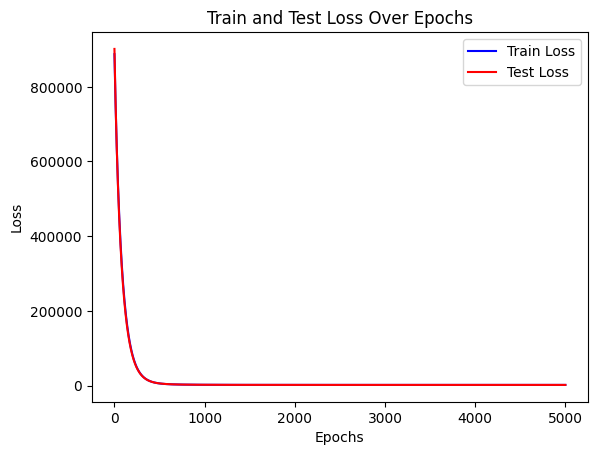

In [58]:
plt.plot(train_losses, color='blue', label='Train Loss')
plt.plot(test_losses, color='red', label='Test Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss Over Epochs')

plt.legend()

plt.show()

In [59]:
predicted_y_test = predicted_y_test.numpy()  # Convert PyTorch tensor to numpy
y_test = y_test_tensor.numpy()  # Convert PyTorch tensor to numpy

# Create a dictionary with the two arrays
d = {'y_pred': predicted_y_test.flatten(), 'y_test': y_test.flatten()}

# Create a DataFrame
df = pd.DataFrame(d)

# Print the DataFrame
print(df)

          y_pred  y_test
0     814.804932   796.0
1     598.654053   643.0
2     834.915527   740.0
3     265.530182   331.0
4    1102.031494  1151.0
..           ...     ...
239   245.575363   330.0
240   997.971802   977.0
241  1380.345337  1345.0
242  1034.784546  1017.0
243   704.909424   707.0

[244 rows x 2 columns]


In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predicted_y_test)
mae = mean_absolute_error(y_test, predicted_y_test)
r2 = r2_score(y_test, predicted_y_test)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 1559.8404541015625
Mean Absolute Error (MAE): 30.295902252197266
R-squared (R²): 0.979320764541626


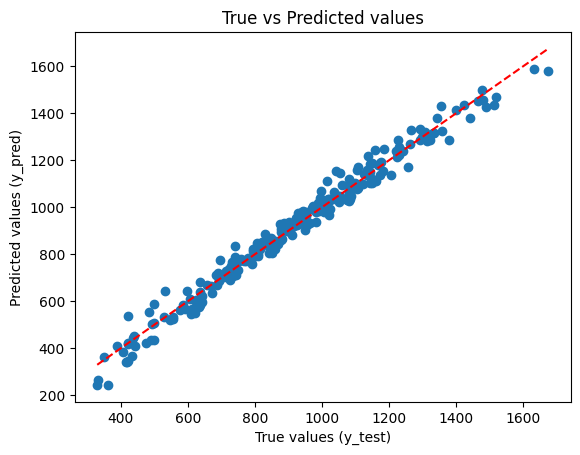

In [61]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predicted_y_test)
plt.xlabel("True values (y_test)")
plt.ylabel("Predicted values (y_pred)")
plt.title("True vs Predicted values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.show()
